### K-promedios (k-means)

De manera análoga al agrupamiento jerárquico, k-means es un algoritmo goloso que sin embargo, resulta ser mucho más eficiente que el primero para encontrar etiquetas candidatas para agrupar a las observaciones en clusters. Dicha eficiencia va de la mano con que a diferencia del agrupamiento jerárquico, k-means requiere que de manera *a priori* se determine el número $k$ de clusters que se desea obtener. Lo anterior puede representar desde una decisión trivial hasta un reto que requiera de la exploración heurística de distintos valores de $k$.

El algoritmo se lleva a cabo mediante los siguientes pasos:

1. Se seleccionan $k$ observaciones al azar, las cuales fungirán como centroides de los clusters a generar.
2. Se agrupa a todas las observaciones dentro del cluster cuyo centroide se encuentre más cercano a cada observación.
3. Se recomputan los centroides de acuerdo con el promedio aritmético de las observaciones agrupadas.
4. Se repite el proceso de asignación de las observaciones a cada cluster pero utilizando los centroides recalculados.
5. Se repite el proceso hasta que los centroides recalculados en la iteración $i+1$ no sean "diferentes" de los de la iteración $i$.

Se conoce como centroide a aquel punto que es encontrado a partir de promediar (encontrar la mediana o minimizar alguna función de distanca) $n$ puntos que definen en dimensión 2 un polígono de $n-1$ lados, que en dimensiones mayores (más de dos atributos) se trata de un hiperpoliedro.

Tiene variaciones conocidas como **k-medianas** o **k-medioides** y la diferencia en la aplicación de ambos en contraste con k-means radica en cambiar el criterio mediante el que se calcula un nuevo centroide en el paso 3, ya sea por encontrar la mediana de los datos dentro del cluster o encontrando al dato que minimice alguna medida de distancia de las demás observaciones dentro del cluster respecto a él. Ambos algoritmos se diferencian de k-means en que el centroide elegido forma parte del conjunto de datos en ambos casos, mientras que en el caso del primero el promedio aritmético no necesariamente es un punto o valor que se encuentre dentro del conjunto de observaciones.

La **complejidad de este algoritmo es típicamente $nk$** con $n$ el número de observaciones y $k$ el número de centroides elegido. Esto suele ser típicamente más rápido que $n^2$ y por lo mismo se trata de uno de los algoritmos más usados para el agrupamiento de observaciones.

K-means es un algoritmo **no determinista**, esto debido a que los $k$ centroides iniciales son elegidos de manera aleatoria. Por lo tanto si dicha elección cambia, el resultado del agrupamiento final no será necesariamente el mismo.

La determinación del valor óptimo de $k$ puede hacerse a partir de un conjunto que esté conformado por $p$ tuplas de tamaño $k$ que alberguen a $k$ centroides seleccionados aleatoriamente. Posteriormente se puede aplicar k-means para cada una de estas tuplas y seleccionar aquel agrupamiento que tenga una menor medida de disimilaridad. Otra manera de guiar la elección del valor de $k$, sobre todo si el conjunto de datos es muy grande, es utilizar el algoritmo de **agrupamiento jerárquico** en una muestra de los datos para así determinar el valor de $k$ y posteriormente aplicar **k-means** sobre todo el conjunto.



In [ ]:
db  = read.csv('peliculas.csv')

adjustingKMeans <-function(vector){
    varianza = c()
    for(i in 1:10){
        modelo = kmeans(vector,i)
        varianza_explicada = modelo$betweenss/modelo$totss
        varianza[i] =  varianza_explicada
    }
    return(varianza)
}


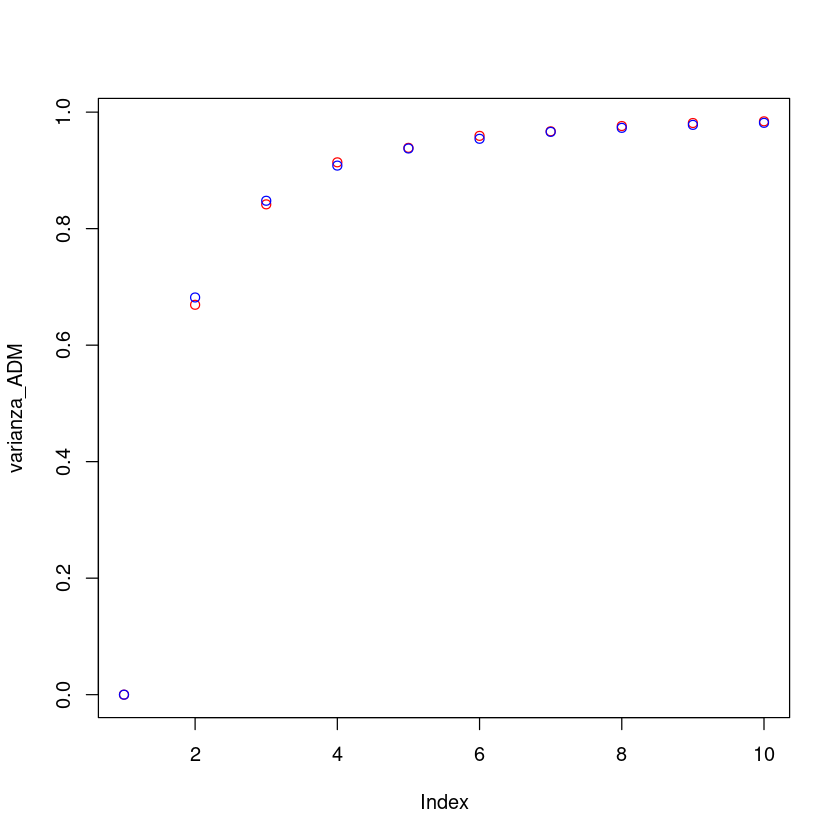

In [ ]:
varianza_ADM = adjustingKMeans(db$ADM_WK)
varianza_LOG_ADM = adjustingKMeans(log(db$ADM_WK))
plot(varianza_ADM, col="red")
points(varianza_LOG_ADM, col="blue")